# Project 1

1. Load in and clean up the data:
   
(a) make sure your data is formatted correctly

(b) check for wrong or missing data (check square footage, price, date of sale etc.)

(c) consider only actual sales

(d) remove outliers that do not look like actual sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv('rollingsales_manhattan.csv', header=0)

# Format sale prices to numbers
# remove $ from sale price 
data['SALE PRICE'] = data['SALE PRICE'].str.replace('$', '')
data['SALE PRICE'] = data['SALE PRICE'].str.replace(',', '').astype(float)

# Remove data that don't have a neighborhood
data = data[data['NEIGHBORHOOD'].str.contains('[a-zA-Z]', na=False)]

# Remove data that have a sale price of less than 100
data = data[data['SALE PRICE'] > 100]

# Remove commas in land square feet and gross square feet
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].str.replace(',', '')
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].str.replace(',', '')

# Convert land square feet and gross square feet to numbers
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')

# Remove data that have a land square feet of 0
data = data[data['LAND SQUARE FEET'] != 0]

# Remove non-unique columns
data.drop(['BOROUGH', 'EASE-MENT'], axis=1, inplace=True)

# Put data in a new csv file
data.to_csv('clean_rollingsales_manhattan.csv', index=False)

# Set the display format to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
print(data.describe())


        BLOCK     LOT  ZIP CODE  COMMERCIAL UNITS  LAND SQUARE FEET  \
count 2790.00 2790.00   2790.00           2790.00           2790.00   
mean  1178.80   45.28  10020.61              2.00           6284.37   
std    494.15   68.15    191.50              5.57           8043.54   
min     11.00    1.00      0.00              0.00            469.00   
25%   1009.00   30.00  10019.00              0.00           2329.25   
50%   1009.00   37.00  10019.00              2.00           7532.00   
75%   1514.25   40.00  10027.00              2.00           7532.00   
max   2246.00 1502.00  10463.00            150.00         213650.00   

       GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE    SALE PRICE  
count            2790.00     2790.00                    2790.00       2790.00  
mean            64298.32     1906.17                       3.08    8497781.15  
std             71107.48      313.86                       1.14   38463825.63  
min                 0.00        0.00    

2. Perform some simple exploratory data analysis to visualize data:
   
(a) across neighborhoods

(b) across time.

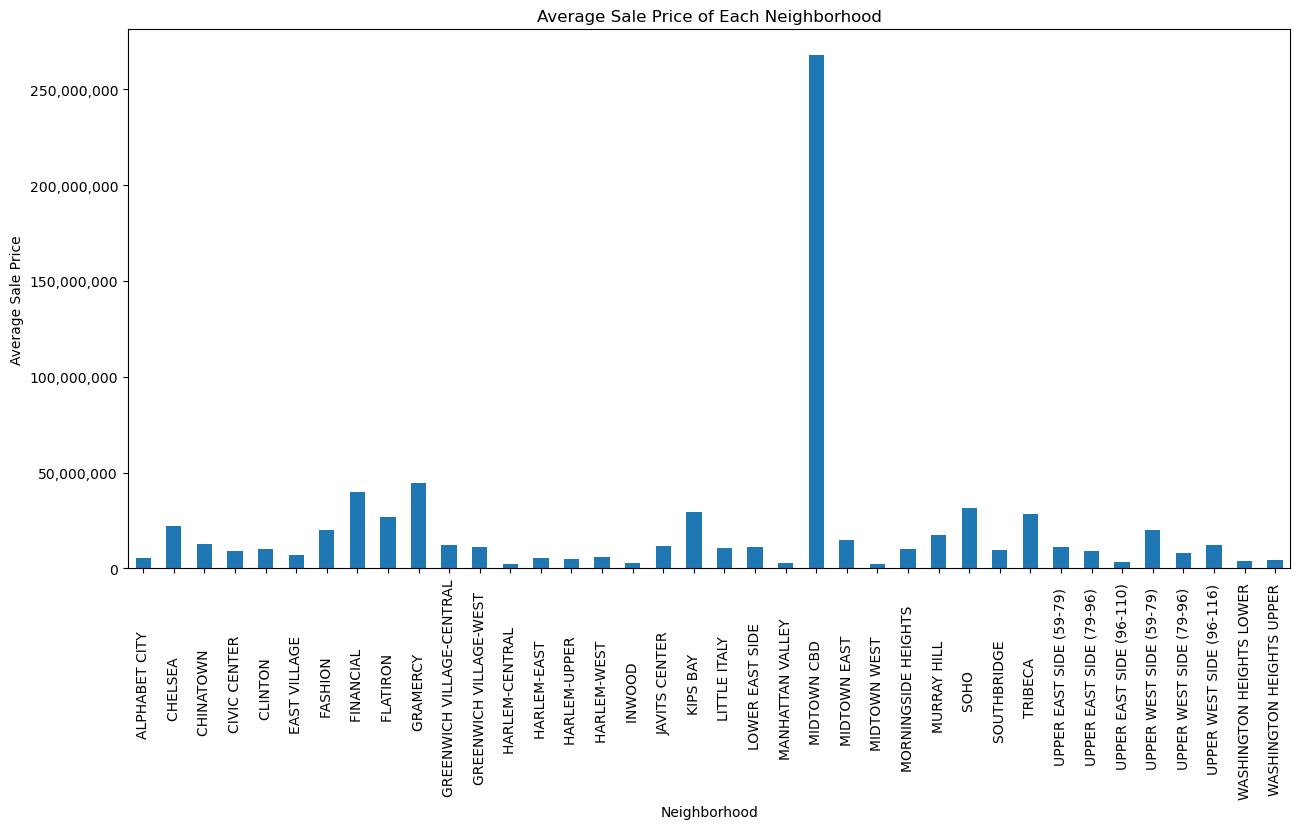

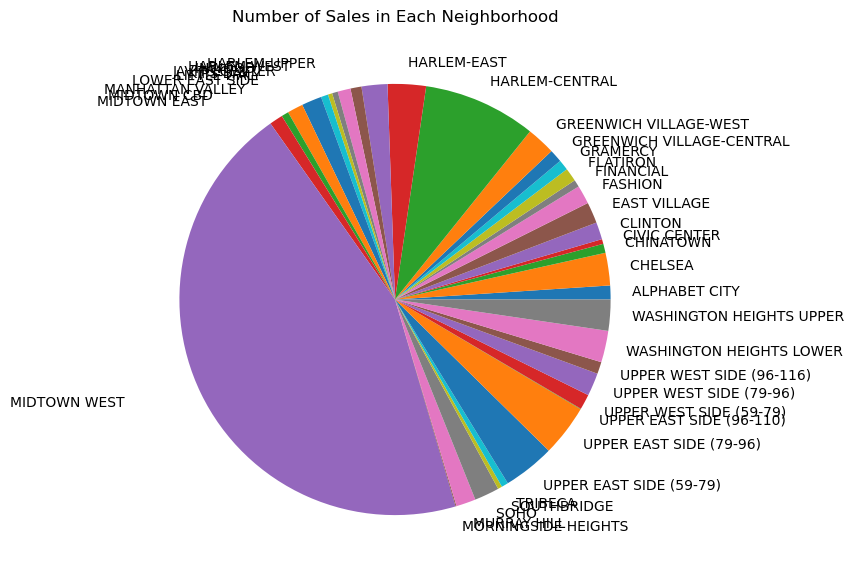

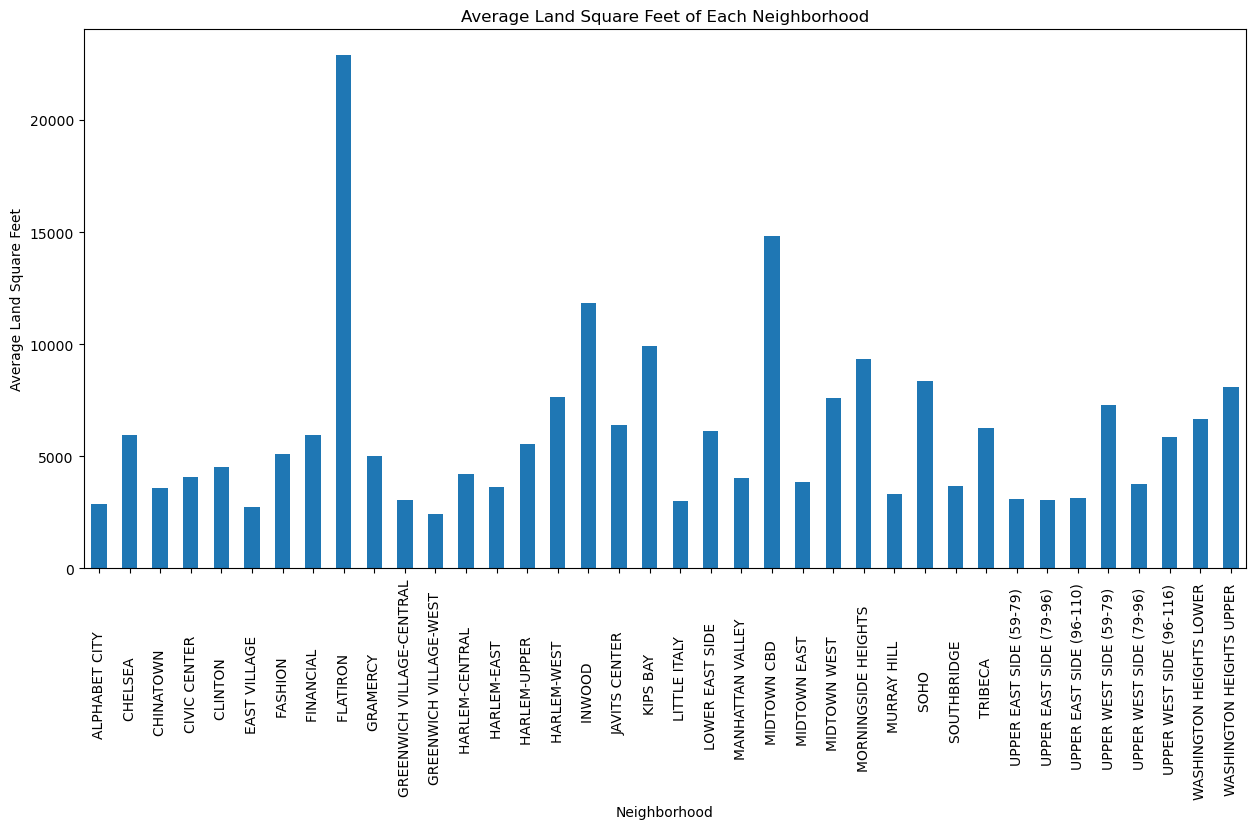

In [2]:
# Sort data by neighborhood
neighborhoods = data.groupby('NEIGHBORHOOD')['SALE PRICE']

# Average sale price of each neighborhood
neighborhoods.mean().plot(kind='bar', figsize=(15, 7))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Average Sale Price of Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sale Price')
plt.show()

# Number of sales in each neighborhood
neighborhoods.count().plot(kind='pie', figsize=(7, 7))
plt.title('Number of Sales in Each Neighborhood')
plt.ylabel('')
plt.show()

# Average land square feet of each neighborhood
neighborhoods = data[data['LAND SQUARE FEET'] != 0].groupby('NEIGHBORHOOD')['LAND SQUARE FEET']
neighborhoods.mean().plot(kind='bar', figsize=(15, 7))
plt.title('Average Land Square Feet of Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Land Square Feet')
plt.show()


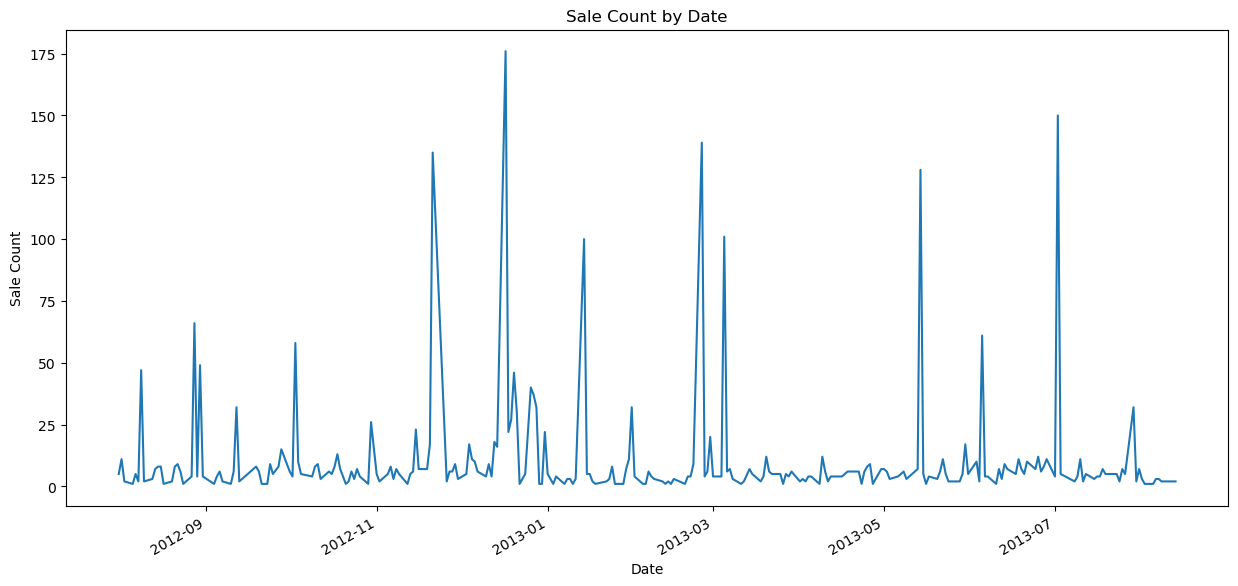

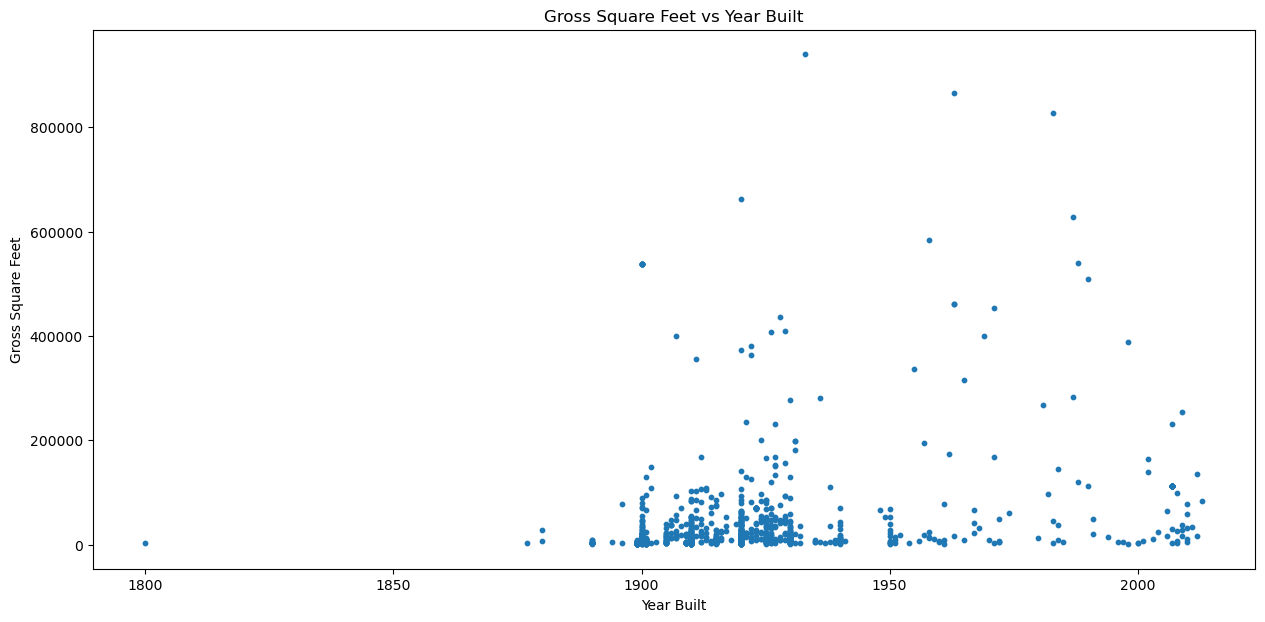

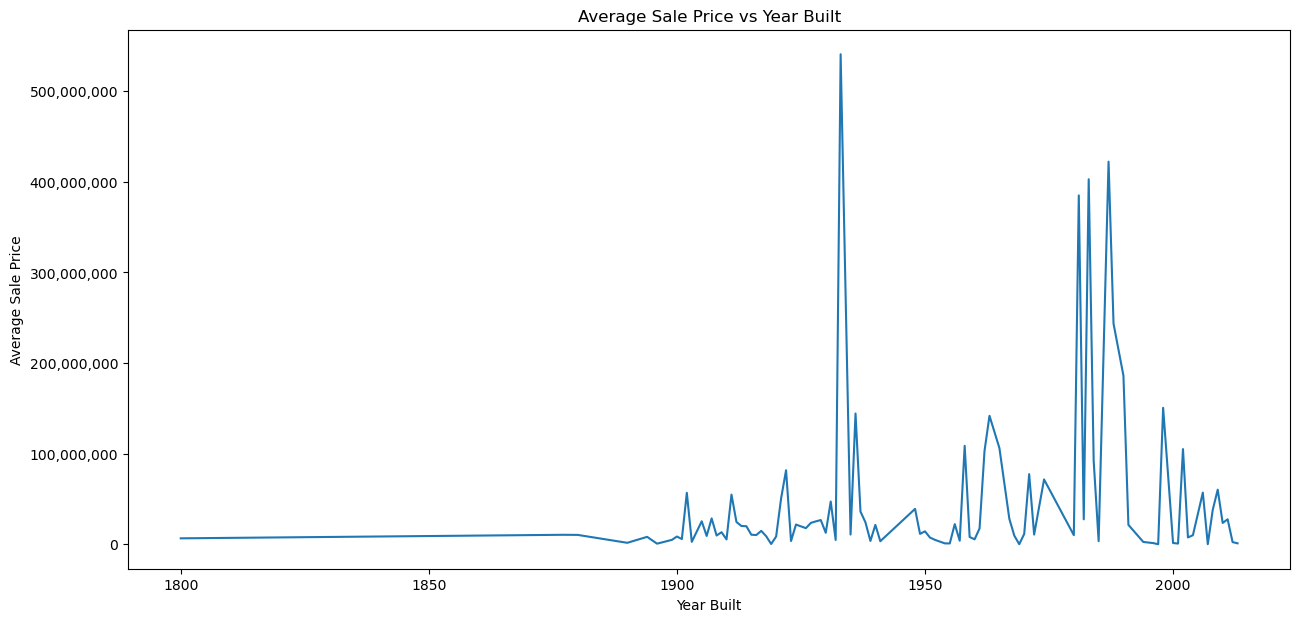

In [3]:
# Sale count by date
data['Sorted Date'] = pd.to_datetime(data['SALE DATE'])
dates = data.groupby('Sorted Date')['SALE PRICE']
dates.count().plot(kind='line', figsize=(15, 7))
plt.title('Sale Count by Date')
plt.xlabel('Date')
plt.ylabel('Sale Count')
plt.show()

# Land square feet vs year built
data = data[data['YEAR BUILT'] != 0]
data = data[data['GROSS SQUARE FEET'] != 0]
data.plot(kind='scatter', x='YEAR BUILT', y='GROSS SQUARE FEET', figsize=(15, 7), s=10)
plt.title('Gross Square Feet vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Gross Square Feet')
plt.show()

# Average sale price vs year built
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
data.groupby('YEAR BUILT')['SALE PRICE'].mean().plot(kind='line', figsize=(15, 7))
plt.title('Average Sale Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.show()


3. Estimate parameters for sale price, overall and per neighborhood:

(a) range

(b) median

(c) average

(d) standard deviation

In [4]:
# Overall
print("Range:", data['SALE PRICE'].max() - data['SALE PRICE'].min())
print("Median:", data['SALE PRICE'].median())
print("Average:", data['SALE PRICE'].mean())
print("Standard deviation:", data['SALE PRICE'].std())

# Per Neighborhood

neighborhood_stats = pd.DataFrame({
    'Range': neighborhoods.max() - neighborhoods.min(),
    'Median': neighborhoods.median(),
    'Average': neighborhoods.mean(),
    'Standard deviation': neighborhoods.std()
})

print(neighborhood_stats)


Range: 1099999817.0
Median: 859000.0
Average: 8343471.54662735
Standard deviation: 38721889.42157232
                            Range   Min   Median  Average  Standard deviation
NEIGHBORHOOD                                                                 
ALPHABET CITY                6600  1500  2404.00  2865.69             1341.91
CHELSEA                     50688   937  2484.50  5932.19             7558.49
CHINATOWN                    8989  1708  2923.00  3610.11             2126.47
CIVIC CENTER                 6864   705  3868.50  4099.10             2262.25
CLINTON                     28920  1205  2510.00  4516.75             6309.81
EAST VILLAGE                12109   900  2369.00  2739.73             1999.81
FASHION                     45167  1333  2469.00  5084.38             7516.11
FINANCIAL                   22640   915  2796.00  5938.60             7127.26
FLATIRON                    87548  1392  5533.00 22895.04            35231.09
GRAMERCY                    33420  1080  